In [1]:
# In this notebook we analyze England flood map via cluster analysis

In [2]:
data_url = 'https://www.kaggle.com/getthedata/open-flood-risk-by-postcode/home'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
forig = pd.read_csv('englandfloodrisk.csv',index_col=0)

forig.head()

,postcode,fid,prob,suitability,pubdate,insurancerisk,easting,northing,lat,lon
251,TR19 7PL,2752,High,County to Town,2009-08-01,Yes,137342,31843,50.128392,-5.676455
261,TR19 7PG,2752,High,County to Town,2009-08-01,Yes,137528,31842,50.128465,-5.673858
272,TR19 7PH,2752,High,County to Town,2009-08-01,Yes,137639,31886,50.128909,-5.672338
371,TR19 7TW,301675,Low,County to Town,2009-08-01,No,138998,34624,50.154083,-5.655239
375,TR19 7TN,301509,Low,County to Town,2009-08-01,No,139059,34530,50.153266,-5.654322


In [6]:
forig['prob'].value_counts()

Low         80001
Medium      24928
High        12305
Very Low     4773
Name: prob, dtype: int64

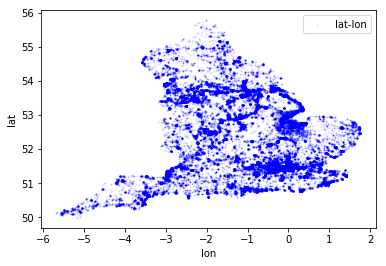

In [7]:
# quickly visualizing all data points

plt.scatter(forig['lon'].values[:],
            forig['lat'].values[:],
            color='blue', s=1, label='lat-lon', alpha=0.1
           )

plt.legend(loc=0)
plt.ylabel('lat')
plt.xlabel('lon')

plt.show()

In [8]:
fhi = forig[forig['prob'] == 'High']

fhi.shape

(12305, 10)

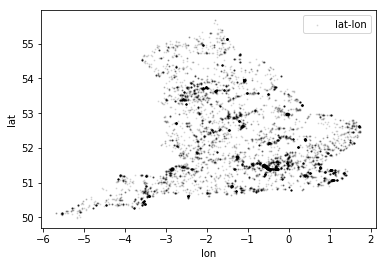

In [9]:
# quickly visualizing high flood risk data points

plt.scatter(fhi['lon'].values[:],
            fhi['lat'].values[:],
            color='black', s=1, label='lat-lon', alpha=0.1
           )

plt.legend(loc=0)
plt.ylabel('lat')
plt.xlabel('lon')

plt.show()

In [10]:
from scipy.cluster.vq import kmeans2, whiten

In [11]:
# turn high risk data points into lat-lon coordinates

coordh = fhi.iloc[:,8:10].values

coordh[:5]

array([[50.128392, -5.676455],
       [50.128465, -5.673858],
       [50.128909, -5.672338],
       [50.109733, -5.5614  ],
       [50.109388, -5.560339]])

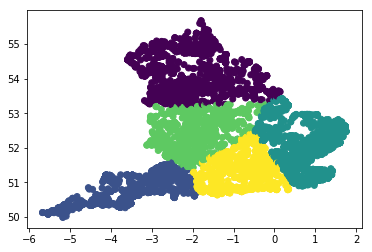

In [12]:
# clusters of high flood areas;  set at 5 clusters

x, y = kmeans2(whiten(coordh), k=5, iter=20)
plt.scatter(coordh[:,1], coordh[:,0], c=y);
plt.show()

In [13]:
# turn all data points into lat-lon coordinates

coorda = forig.iloc[:,8:10].values

coorda[:5]

array([[50.128392, -5.676455],
       [50.128465, -5.673858],
       [50.128909, -5.672338],
       [50.154083, -5.655239],
       [50.153266, -5.654322]])

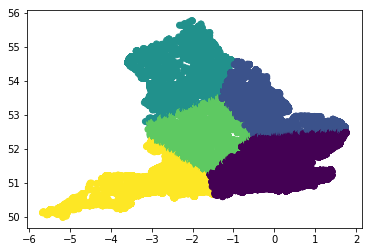

In [14]:
# clusters of all flood areas;  set at 5 clusters
# we see that the clusters are different from high only

x, y = kmeans2(whiten(coorda), k=5, iter=20)
plt.scatter(coorda[:,1], coorda[:,0], c=y);
plt.show()

Add in more features to kmeans2

In [15]:
forig['probval'] = forig['prob'].map({'High': 5, 'Medium': 3,
                                      'Low': 1, 'Very Low': 0.1})

forig['probval'].value_counts()

# High - >3.3% --> 5
# Medium - <= 3.3% & >1% --> 3
# Low - <=1% & >0.1% --> 1
# Very Low - <=0.1% --> 0.1

1.0    80001
3.0    24928
5.0    12305
0.1     4773
Name: probval, dtype: int64

In [16]:
# add probval into kmeans2 array

coordnew = forig.iloc[:,8:11].values

coordnew[:5]

array([[50.128392, -5.676455,  5.      ],
       [50.128465, -5.673858,  5.      ],
       [50.128909, -5.672338,  5.      ],
       [50.154083, -5.655239,  1.      ],
       [50.153266, -5.654322,  1.      ]])

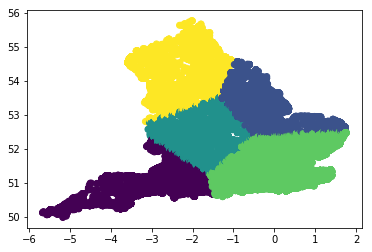

In [17]:
# clusters of all flood areas with probval;  set at 5 clusters
# we see only a small difference

x, y = kmeans2(whiten(coorda), k=5, iter=20)
plt.scatter(coorda[:,1], coorda[:,0], c=y);
plt.show()

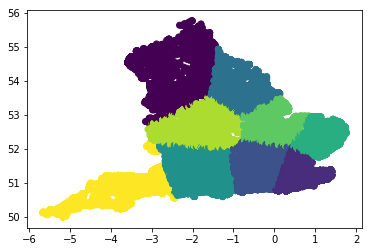

In [20]:
x, y = kmeans2(whiten(coorda), k=9, iter=20)
plt.scatter(coorda[:,1], coorda[:,0], c=y);
plt.show()

In [21]:
# though outcome was interesting,
# overall cluster ananlysis was not meaningful
# due to the lack of features